In [ ]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
transform = transforms.ToTensor()

In [ ]:
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 34316473.15it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1143965.91it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9420334.40it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3833875.78it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
batch_size = 20

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=0)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=0)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

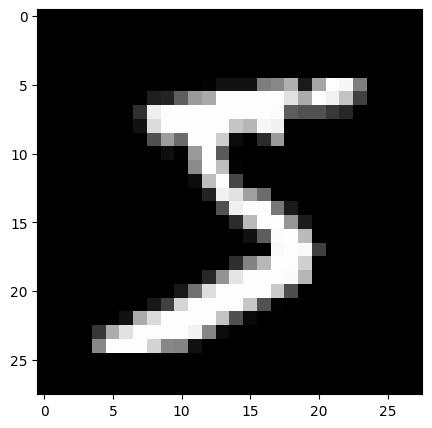

In [ ]:
dataiter = iter(train_loader)
images, labels = next(iter(train_loader))
images = images.numpy()
img = np.squeeze(images[0])
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        self.fc1 = nn.Linear(28 * 28, encoding_dim)
        self.fc2 = nn.Linear(encoding_dim, 28*28)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        return x

In [ ]:
encoding_dim = 32
model = Autoencoder(encoding_dim)
print(model)

Autoencoder(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=784, bias=True)
)


In [ ]:
criterion = nn.MSELoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [ ]:
n_epochs = 100
for epoch in range(1, n_epochs+1):
    train_loss = 0.0
    for data in train_loader:
        images, _ = data
        images = images.view(images.size(0), -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} tTraining Loss: {:.6f}'.format(
        epoch,
        train_loss ))

Epoch: 1 tTraining Loss: 0.223229
Epoch: 2 tTraining Loss: 0.222181
Epoch: 3 tTraining Loss: 0.221380
Epoch: 4 tTraining Loss: 0.220754
Epoch: 5 tTraining Loss: 0.220255
Epoch: 6 tTraining Loss: 0.219847
Epoch: 7 tTraining Loss: 0.219507
Epoch: 8 tTraining Loss: 0.219219
Epoch: 9 tTraining Loss: 0.218970
Epoch: 10 tTraining Loss: 0.218753
Epoch: 11 tTraining Loss: 0.218560
Epoch: 12 tTraining Loss: 0.218388
Epoch: 13 tTraining Loss: 0.218233
Epoch: 14 tTraining Loss: 0.218092
Epoch: 15 tTraining Loss: 0.217964
Epoch: 16 tTraining Loss: 0.217845
Epoch: 17 tTraining Loss: 0.217737
Epoch: 18 tTraining Loss: 0.217636
Epoch: 19 tTraining Loss: 0.217542
Epoch: 20 tTraining Loss: 0.217455
Epoch: 21 tTraining Loss: 0.217373
Epoch: 22 tTraining Loss: 0.217297
Epoch: 23 tTraining Loss: 0.217226
Epoch: 24 tTraining Loss: 0.217158
Epoch: 25 tTraining Loss: 0.217095
Epoch: 26 tTraining Loss: 0.217035
Epoch: 27 tTraining Loss: 0.216979
Epoch: 28 tTraining Loss: 0.216925
Epoch: 29 tTraining Loss: 0.2

In [ ]:
images, labels = next(iter(test_loader))
images_flatten = images.view(images.size(0), -1)
output = model(images_flatten)
images = images.numpy()
output = output.view(batch_size, 1, 28, 28)
output = output.detach().numpy()
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)